In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [30]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [31]:
%conda install -y -q pytorch torchvision torchaudio cpuonly -c pytorch
# %conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import torch

In [33]:
torch.cuda.is_available()

False

In [34]:
import torchvision

In [36]:
from torchvision.datasets import MNIST

In [37]:
from torchvision import transforms

In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomRotation(20)])

In [39]:
training_data = MNIST('./mndist', train=True,  download=True, transform=transform)

In [40]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mndist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
           )

In [21]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True, num_workers=2)

In [26]:
import torch.nn as nn
import torch.nn.functional as F

In [121]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(784, 10)
        
    def forward(self, x):
        x = x.flatten(1)  # flatten domension 1 and higher (4, 1, 27, 27) => (4, 724)
        a = self.fc(x)
        return a   


In [117]:
net = MyNet()
net

MyNet(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

In [120]:
net.state_dict()

[Parameter containing:
 tensor([[ 0.0252, -0.0297,  0.0356,  ..., -0.0292, -0.0068,  0.0313],
         [-0.0200,  0.0026,  0.0107,  ...,  0.0279, -0.0153, -0.0255],
         [ 0.0156, -0.0088, -0.0174,  ..., -0.0256, -0.0107, -0.0245],
         ...,
         [-0.0006,  0.0221,  0.0152,  ...,  0.0338, -0.0013, -0.0066],
         [-0.0334,  0.0209,  0.0232,  ...,  0.0334, -0.0319,  0.0272],
         [ 0.0131, -0.0141,  0.0265,  ..., -0.0179, -0.0086, -0.0306]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0296,  0.0310, -0.0088, -0.0177,  0.0062,  0.0294,  0.0047, -0.0033,
         -0.0227, -0.0171], requires_grad=True)]

In [27]:
def show_batch(images, targets, predictions=None):
    ncols = int(ceil(sqrt(len(images))))
    nrows = int(ceil(len(images)/ncols))
    for i in range(len(images)):
        subplot(nrows, ncols, i+1)
        imshow(images[i].numpy().squeeze())
        xticks([]); yticks([]); 
        if predictions is not None:
            xlabel("P:{}, T:{}".format( predictions[i].numpy(), targets[i].numpy()))
        elif targets is not None:
            xlabel("T:{}".format(targets[i].numpy()))


In [124]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Will discuss lr and momentum later

In [150]:
log_interval = 500
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 1):
        # get the inputs
        inputs, labels = data

        # zero the cached parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)               
        loss = criterion(outputs, labels)   
        loss.backward()                 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % log_interval == 0:    # print every log_interval mini-batches
            print(f'epoch:{epoch}, iter:{i:5},  loss: {running_loss / log_interval}' )
            running_loss = 0.0

print('Finished Training')


epoch:0, iter:  500,  loss: 1.3474414148926734
epoch:0, iter: 1000,  loss: 0.8143221277892589
epoch:0, iter: 1500,  loss: 0.6714210432320833
epoch:0, iter: 2000,  loss: 0.6337278556749225
epoch:0, iter: 2500,  loss: 0.5794925713688135
epoch:0, iter: 3000,  loss: 0.5768255235552788
epoch:0, iter: 3500,  loss: 0.5471927864812315
epoch:0, iter: 4000,  loss: 0.5453198188394308
epoch:0, iter: 4500,  loss: 0.5436137070804834
epoch:0, iter: 5000,  loss: 0.5016427075080574
epoch:0, iter: 5500,  loss: 0.4966682936400175
epoch:0, iter: 6000,  loss: 0.5100949329435825
epoch:0, iter: 6500,  loss: 0.4889031411409378
epoch:0, iter: 7000,  loss: 0.49768869108334185
epoch:0, iter: 7500,  loss: 0.4830499007645994
epoch:0, iter: 8000,  loss: 0.47440576781705024
epoch:0, iter: 8500,  loss: 0.47639716785773634
epoch:0, iter: 9000,  loss: 0.4848850522786379
epoch:0, iter: 9500,  loss: 0.48449773160740733
epoch:0, iter:10000,  loss: 0.47726898663118483
epoch:0, iter:10500,  loss: 0.4937967361975461
epoch:0,

KeyboardInterrupt: 

In [160]:
test_data = MNIST('./mndist', train=False,  download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, num_workers=2)

In [161]:
with torch.no_grad():
    cm = np.zeros((10,10), dtype=np.int64)
    for x, y in iter(test_loader):
        p = net(x).argmax(1).numpy()
        for pred, true in zip(p, y):
            cm[int(pred), int(true)] += 1

Install $\texttt{seaborn}$ to plot confusion matrices (and many other things) easily.   

In [163]:
%pip install -q seaborn 
import seaborn as sn

Note: you may need to restart the kernel to use updated packages.


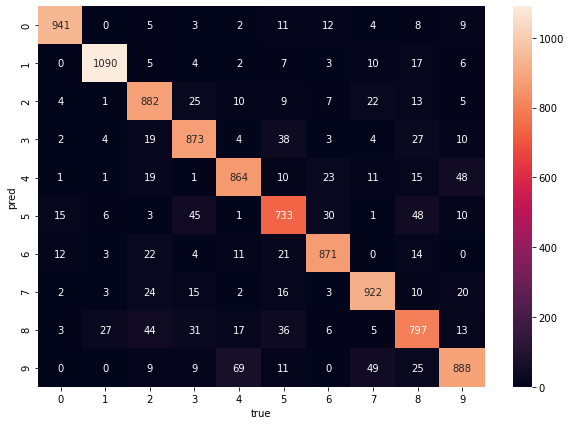

In [165]:
figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='d', annot=True);
ylabel('pred')
xlabel('true');

In [166]:
acc = np.trace(cm)/ np.sum(cm)
acc

0.8861